# Sentiment Analysis on IMDB movie reviews

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## IMDB Movie Ratings Sentiment Analysis
source: https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis

## Importing and Inspecting Data

In [4]:
data = pd.read_csv('F:/Career/Applications/AI WideBot/movie.csv')

In [5]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [123]:
# see datatypes & if there are nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39723 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            39723 non-null  object
 1   label           39723 non-null  int64 
 2   word_count      39723 non-null  int64 
 3   cleaned_text    39723 non-null  object
 4   processed_text  39723 non-null  object
 5   final_text      39723 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.1+ MB


## Data Exploration (EDA)

In [14]:
data.shape

(40000, 2)

In [16]:
# checking for duplicates
duplicates_count=data.duplicated().sum()
duplicates_count

277

In [18]:
# dropping dups
data.drop_duplicates(inplace=True)

In [21]:
#checking class impalance
data['label'].value_counts()

1    19908
0    19815
Name: label, dtype: int64

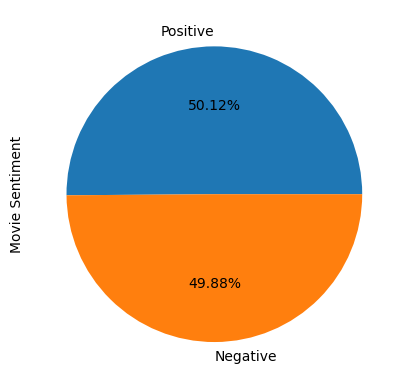

In [34]:
plt.pie(data['label'].value_counts(),labels=['Positive','Negative'],autopct='%.2f%%')
plt.ylabel('Movie Sentiment');

Turnes out data is almost exactly balanced

In [23]:
# How many words per review
data['word_count']=data['text'].apply(lambda x:len(x.split()))

In [24]:
data.head()

,text,label,word_count
0,I grew up (b. 1965) watching and loving the Th...,0,151
1,"When I put this movie in my DVD player, and sa...",0,326
2,Why do people who do not know what a particula...,0,184
3,Even though I have great interest in Biblical ...,0,69
4,Im a die hard Dads Army fan and nothing will e...,1,178


<Axes: xlabel='word_count', ylabel='Count'>

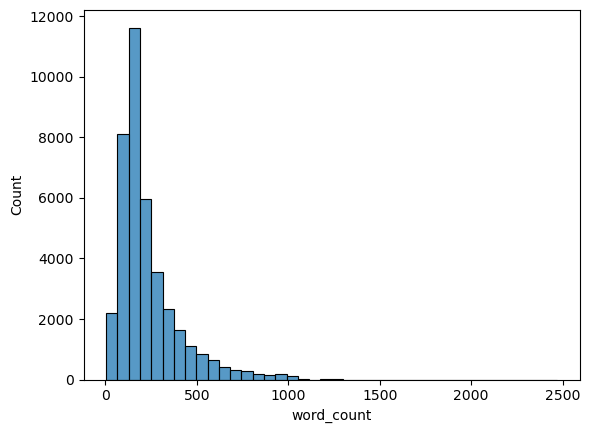

In [29]:
# checking the data distribution
sns.histplot(x=data['word_count'],bins=40)

Turnes out data is right-skewed and there are few anomalies

## Data Preprocessing NLTK

In [35]:
#standarising data to lower case & punctuation removal
import re

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Apply cleaning to the text column
data['cleaned_text'] = data['text'].apply(clean_text)

In [40]:
# sample review
data['cleaned_text'][2]

'why do people who do not know what a particular time in the past was like feel the need to try to define that time for others replace woodstock with the civil war and the apollo moonlanding with the titanic sinking and youve got as realistic a flick as this formulaic soap opera populated entirely by lowlife trash is this what kids who were too young to be allowed to go to woodstock and who failed grade school composition do ill show those old meanies ill put out my own movie and prove that you dont have to know nuttin about your topic to still make money yeah we already know that the one thing watching this film did for me was to give me a little insight into underclass thinking the next time i see a slut in a bar who looks like diane lane im running the other way its child abuse to let parents that worthless raise kids its audience abuse to simply stick woodstock and the moonlanding into a flick as if that ipso facto means the film portrays 1969'

In [41]:
# Tokinaizing & Lemmatizing data
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data files
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...


,text,label,word_count,cleaned_text,processed_text
0,I grew up (b. 1965) watching and loving the Th...,0,151,i grew up b 1965 watching and loving the thund...,i grew up b 1965 watching and loving the thund...
1,"When I put this movie in my DVD player, and sa...",0,326,when i put this movie in my dvd player and sat...,when i put this movie in my dvd player and sat...
2,Why do people who do not know what a particula...,0,184,why do people who do not know what a particula...,why do people who do not know what a particula...
3,Even though I have great interest in Biblical ...,0,69,even though i have great interest in biblical ...,even though i have great interest in biblical ...
4,Im a die hard Dads Army fan and nothing will e...,1,178,im a die hard dads army fan and nothing will e...,im a die hard dad army fan and nothing will ev...


In [47]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [48]:
from nltk import pos_tag
from nltk.corpus import wordnet

# Function to get the wordnet POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

Original Tokens: ['The', 'players', 'are', 'playing', 'in', 'the', 'park', '.']
Lemmatized Tokens: ['The', 'player', 'be', 'play', 'in', 'the', 'park', '.']


In [49]:
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token, pos in pos_tags]
    return ' '.join(lemmatized_tokens)

# Apply tokenization and lemmatization
data['processed_text'] = data['cleaned_text'].apply(tokenize_and_lemmatize)

In [50]:
# Display the first few rows of the processed data
data.head()

,text,label,word_count,cleaned_text,processed_text,final_text
0,I grew up (b. 1965) watching and loving the Th...,0,151,i grew up b 1965 watching and loving the thund...,i grow up b 1965 watching and love the thunder...,grew b 1965 watching loving thunderbird mate s...
1,"When I put this movie in my DVD player, and sa...",0,326,when i put this movie in my dvd player and sat...,when i put this movie in my dvd player and sit...,put movie dvd player sat coke chip expectation...
2,Why do people who do not know what a particula...,0,184,why do people who do not know what a particula...,why do people who do not know what a particula...,people know particular time past wa like feel ...
3,Even though I have great interest in Biblical ...,0,69,even though i have great interest in biblical ...,even though i have great interest in biblical ...,even though great interest biblical movie wa b...
4,Im a die hard Dads Army fan and nothing will e...,1,178,im a die hard dads army fan and nothing will e...,im a die hard dad army fan and nothing will ev...,im die hard dad army fan nothing ever change g...


In [43]:
# Dealing with stop words
from nltk.corpus import stopwords

# Download stopwords list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(filtered_tokens)

# Remove stop words
data['final_text'] = data['processed_text'].apply(remove_stopwords)

In [149]:
data['text'][3]

'Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script is horrible. I did not get the point in mixing the story about Abraham and Noah together. So if you value your time and sanity stay away from this horror.'

In [55]:
# Display the first few rows of the final processed data
data['final_text'].head()

,text,label,word_count,cleaned_text,processed_text,final_text
0,I grew up (b. 1965) watching and loving the Th...,0,151,i grew up b 1965 watching and loving the thund...,i grow up b 1965 watching and love the thunder...,grow b 1965 watching love thunderbird mate sch...
1,"When I put this movie in my DVD player, and sa...",0,326,when i put this movie in my dvd player and sat...,when i put this movie in my dvd player and sit...,put movie dvd player sit coke chip expectation...
2,Why do people who do not know what a particula...,0,184,why do people who do not know what a particula...,why do people who do not know what a particula...,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,0,69,even though i have great interest in biblical ...,even though i have great interest in biblical ...,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,1,178,im a die hard dads army fan and nothing will e...,im a die hard dad army fan and nothing will ev...,im die hard dad army fan nothing ever change g...
...,...,...,...,...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1,541,western union is something of a forgotten clas...,western union be something of a forgotten clas...,western union something forgotten classic west...
39996,This movie is an incredible piece of work. It ...,1,50,this movie is an incredible piece of work it e...,this movie be an incredible piece of work it e...,movie incredible piece work explore every nook...
39997,My wife and I watched this movie because we pl...,0,168,my wife and i watched this movie because we pl...,my wife and i watch this movie because we plan...,wife watch movie plan visit sicily stromboli s...
39998,"When I first watched Flatliners, I was amazed....",1,168,when i first watched flatliners i was amazed i...,when i first watch flatliners i be amaze it ha...,first watch flatliners amaze necessary feature...


In [56]:
# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(data['final_text'])

# Display the shape of the TF-IDF matrix
print(tfidf_matrix.shape)

(39723, 147829)


## Train-test split

In [77]:
from sklearn.model_selection import train_test_split

# First split: Split into (train + validation) and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(tfidf_matrix, data['label'], test_size=0.15, random_state=42)

# Second split: Split (train + validation) into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15 / (1 - 0.15), random_state=42)


In [78]:
X_train.shape

(27805, 147829)

In [79]:
X_val.shape

(5959, 147829)

In [80]:
X_test.shape

(5959, 147829)

## Models Development

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

### Exploring prameters and training models for increased accuracy

#### 1) Logistic Regression

In [102]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize the model
LR = LogisticRegression(max_iter=1000)

# Perform grid search
grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Cross-validation Score: 0.8887610142060781


In [103]:
# Identyifing best model
best_lr= grid_search.best_estimator_

In [107]:
# Validate the model
y_val_pred_best = best_lr.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_best))

Validation Accuracy: 0.8867259607316664
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      2934
           1       0.88      0.90      0.89      3025

    accuracy                           0.89      5959
   macro avg       0.89      0.89      0.89      5959
weighted avg       0.89      0.89      0.89      5959



In [108]:
# Predict on the test data
y_pred_best_lr = best_lr.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred_best_lr)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8931028696089948


#### 2) MultinomialNB (Naive Bayes)

In [110]:
# Define the parameter grid
param_grid_nb = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Initialize the model
NB = MultinomialNB()

# Perform grid search
grid_search_nb = GridSearchCV(NB, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search_nb.best_params_)
print("Best Cross-validation Score:", grid_search_nb.best_score_)

Best Parameters: {'alpha': 1}
Best Cross-validation Score: 0.8604207876281244


In [111]:
# Identyifing best model
best_nb= grid_search_nb.best_estimator_

# Validate the model
y_val_pred_best_nb = best_nb.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_best_nb))

Validation Accuracy: 0.8603792582648095
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      2934
           1       0.88      0.84      0.86      3025

    accuracy                           0.86      5959
   macro avg       0.86      0.86      0.86      5959
weighted avg       0.86      0.86      0.86      5959



In [112]:
# Predict on the test data
y_pred_best_nb = best_nb.predict(X_test)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred_best_nb)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8602114448733009


## Performance comparison

In [139]:
# Logistic Regression
print("Logistic Regression:")
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_best))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred_best))
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_lr))
print("-------------------------------------------------------------")
# Naive Bayes
print("Naive Bayes:")
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred_best_nb))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred_best_nb))
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_nb))

Logistic Regression:
Validation Accuracy: 0.8867259607316664
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      2934
           1       0.88      0.90      0.89      3025

    accuracy                           0.89      5959
   macro avg       0.89      0.89      0.89      5959
weighted avg       0.89      0.89      0.89      5959

Test Accuracy: 0.8931028696089948
-------------------------------------------------------------
Naive Bayes:
Validation Accuracy: 0.8603792582648095
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      2934
           1       0.88      0.84      0.86      3025

    accuracy                           0.86      5959
   macro avg       0.86      0.86      0.86      5959
weighted avg       0.86      0.86      0.86      5959

Test Accuracy: 0.8602114448733009


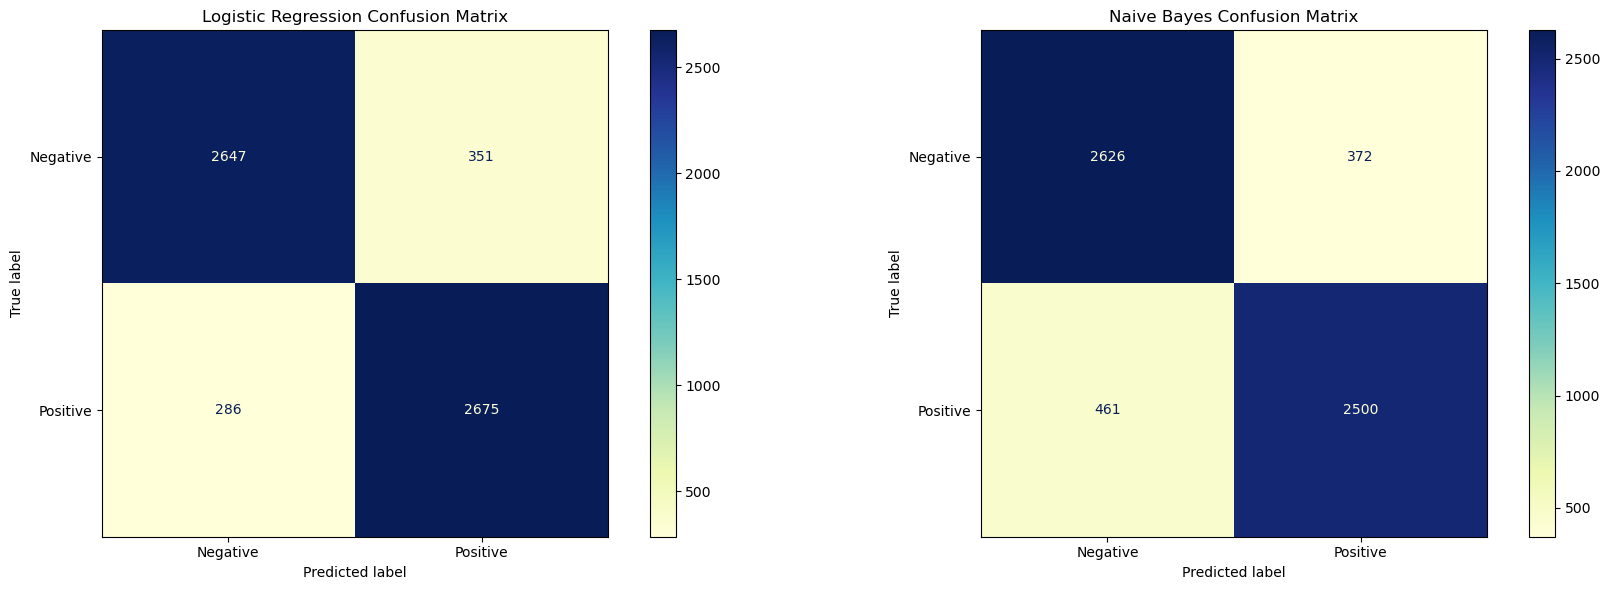

In [140]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# convusion matrix comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_best_lr, labels=best_lr.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Negative', 'Positive'])
disp_lr.plot(ax=ax1,cmap="YlGnBu")
ax1.set_title('Logistic Regression Confusion Matrix')

# Naive Bayes Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_best_nb, labels=best_nb.classes_)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Negative', 'Positive'])
disp_nb.plot(ax=ax2,cmap="YlGnBu")
ax2.set_title('Naive Bayes Confusion Matrix')

plt.tight_layout()
plt.show()

# Final model
After comparison it's clear that the Logistic Regression model is the best model

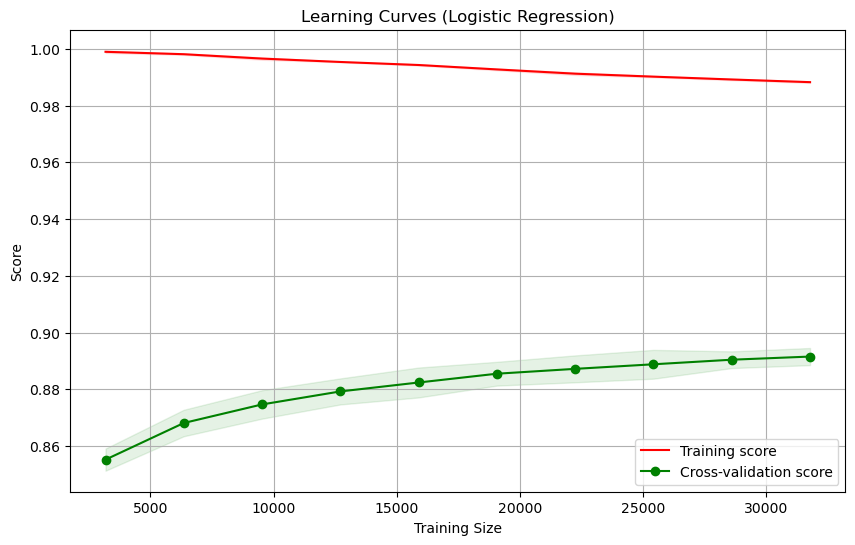

In [122]:
#Plotting performance of best model
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    best_lr, 
    tfidf_matrix, 
    data['label'], 
    train_sizes=np.linspace(0.1, 1.0, 10), 
    cv=5, 
    n_jobs=-1
)

# Calculate mean and std deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

# Plot the standard deviation as shaded regions indecating the spread 
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.title('Learning Curves (Logistic Regression)')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


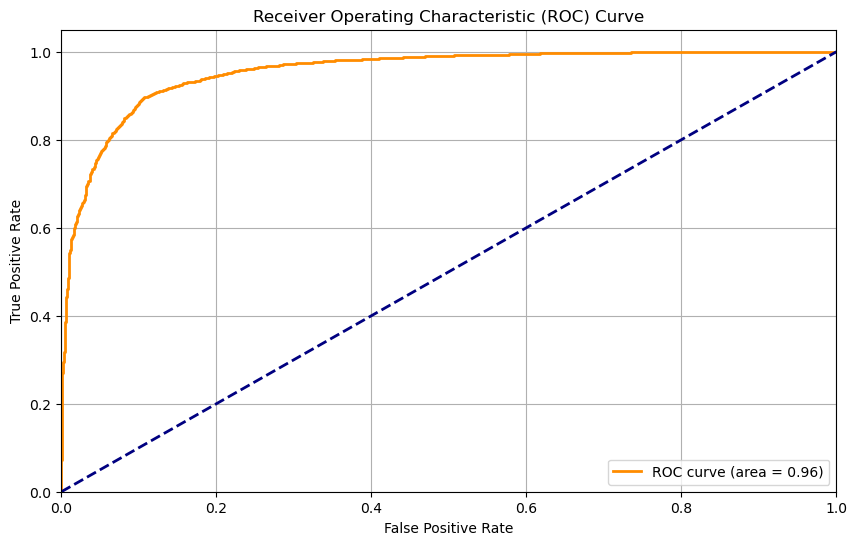

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the test set
y_prob = best_lr.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
